In [41]:
import warnings

warnings.filterwarnings('ignore')

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

data = pd.read_csv("titanic/train.csv", index_col="PassengerId")

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
target = "Survived"

y = data[target]
X = data.drop(target, axis=1)
X.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

age_mean = X["Age"].mean()
# print(age_mean)
X["Age"].fillna(age_mean, inplace=True)

X["Embarked"].fillna("S", inplace=True)
sex_map = {
    "female": 1,
    "male": 0,
}

X["Sex"] = X["Sex"].map(sex_map)

X["Pclass"] = X["Pclass"].astype("category")

X = pd.get_dummies(X)

X.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,0,1,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [46]:
from sklearn.svm import SVC
clf = SVC(gamma="auto")

clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred = clf.predict(X_valid)
y_pred_train = clf.predict(X_train)

In [48]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    clf = SVC(C=value, gamma="auto")
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if i % 5 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

C = 0.01
	acc_valid = 0.600896860986547
	acc_train = 0.6212574850299402

C = 0.1
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988

C = 1.0
	acc_valid = 0.7847533632286996
	acc_train = 0.7874251497005988

C = 10.0
	acc_valid = 0.8071748878923767
	acc_train = 0.812874251497006

C = 100.0
	acc_valid = 0.8161434977578476
	acc_train = 0.8203592814371258

C = 1000.0
	acc_valid = 0.8251121076233184
	acc_train = 0.8368263473053892

C = 10000.0
	acc_valid = 0.8340807174887892
	acc_train = 0.8473053892215568

C = 100000.0
	acc_valid = 0.8071748878923767
	acc_train = 0.8592814371257484



In [104]:
c_values = np.logspace(1, 5, 20)

accuracy_on_valid = []
accuracy_on_train = []

accuracy_on_valid_Max=0
accuracy_on_train_Max=0
c_value_max=0

for i, value in enumerate(c_values):
    clf = SVC(C=value, gamma="auto")
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    if acc_valid > accuracy_on_valid_Max:
        accuracy_on_train_Max = acc_train
        accuracy_on_valid_Max = acc_valid
        c_value_max= value
        
    if i % 1 == 0:
        print('C = {}'.format(value))
        print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

print (f"c_value_max: {c_value_max}, accuracy_on_valid_Max: {accuracy_on_valid_Max}, accuracy_on_train_Max: {accuracy_on_train_Max}" )

C = 10.0
	acc_valid = 0.8071748878923767
	acc_train = 0.812874251497006

C = 16.237767391887218
	acc_valid = 0.8071748878923767
	acc_train = 0.8158682634730539

C = 26.366508987303583
	acc_valid = 0.8071748878923767
	acc_train = 0.8158682634730539

C = 42.81332398719393
	acc_valid = 0.8071748878923767
	acc_train = 0.8158682634730539

C = 69.51927961775606
	acc_valid = 0.8116591928251121
	acc_train = 0.8173652694610778

C = 112.88378916846884
	acc_valid = 0.8161434977578476
	acc_train = 0.8263473053892215

C = 183.29807108324357
	acc_valid = 0.8161434977578476
	acc_train = 0.8323353293413174

C = 297.63514416313194
	acc_valid = 0.820627802690583
	acc_train = 0.8338323353293413

C = 483.2930238571752
	acc_valid = 0.8251121076233184
	acc_train = 0.8368263473053892

C = 784.7599703514607
	acc_valid = 0.8251121076233184
	acc_train = 0.8368263473053892

C = 1274.2749857031336
	acc_valid = 0.8251121076233184
	acc_train = 0.8383233532934131

C = 2069.13808111479
	acc_valid = 0.820627802690583


[-20000.      0.  20000.  40000.  60000.  80000. 100000. 120000.]
[-20000.             0.         20000.         40000.
  60000.         80000.        100000.        120000.
   8858.6679041]


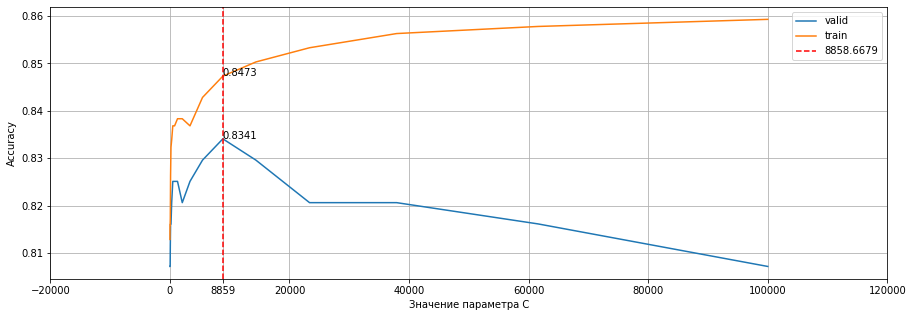

In [151]:
from matplotlib import pyplot as plt
#from pylab import rcParams

#plt.rcParams['figure.figsize'] = 10,10
plt.figure(figsize=(18,6))

%matplotlib inline

fig,ax=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,5)

ax.plot(c_values, accuracy_on_valid, label="valid")
ax.plot(c_values, accuracy_on_train, label="train")

ax.set_xlabel('Значение параметра C')
ax.set_ylabel('Accuracy')

# ax.plot([c_value_max]*10, np.linspace(0.8, 0.875, 10), '--', c = 'r')
ax.axvline(c_value_max, 0, 1, label=str(round(c_value_max, 4)), c='red', linestyle="--")

# ax.text(c_value_max, ax.get_ylim()[0], round(c_value_max, 4) )
ax.text(c_value_max, accuracy_on_valid_Max, round(accuracy_on_valid_Max, 4) )
ax.text(c_value_max, accuracy_on_train_Max, round(accuracy_on_train_Max, 4) )


print(ax.get_xticks())
ax.set_xticks(np.append(ax.get_xticks(),c_value_max))
print(ax.get_xticks())

from matplotlib import ticker

# ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.legend()
ax.grid()

plt.show()



array([-20000.       ,      0.       ,  20000.       ,  40000.       ,
        60000.       ,  80000.       , 100000.       , 120000.       ,
         8858.6679041])